# **Placement Prediction**

**Name:** Fasna

**Organization:** Entri Elevate

**Date:**



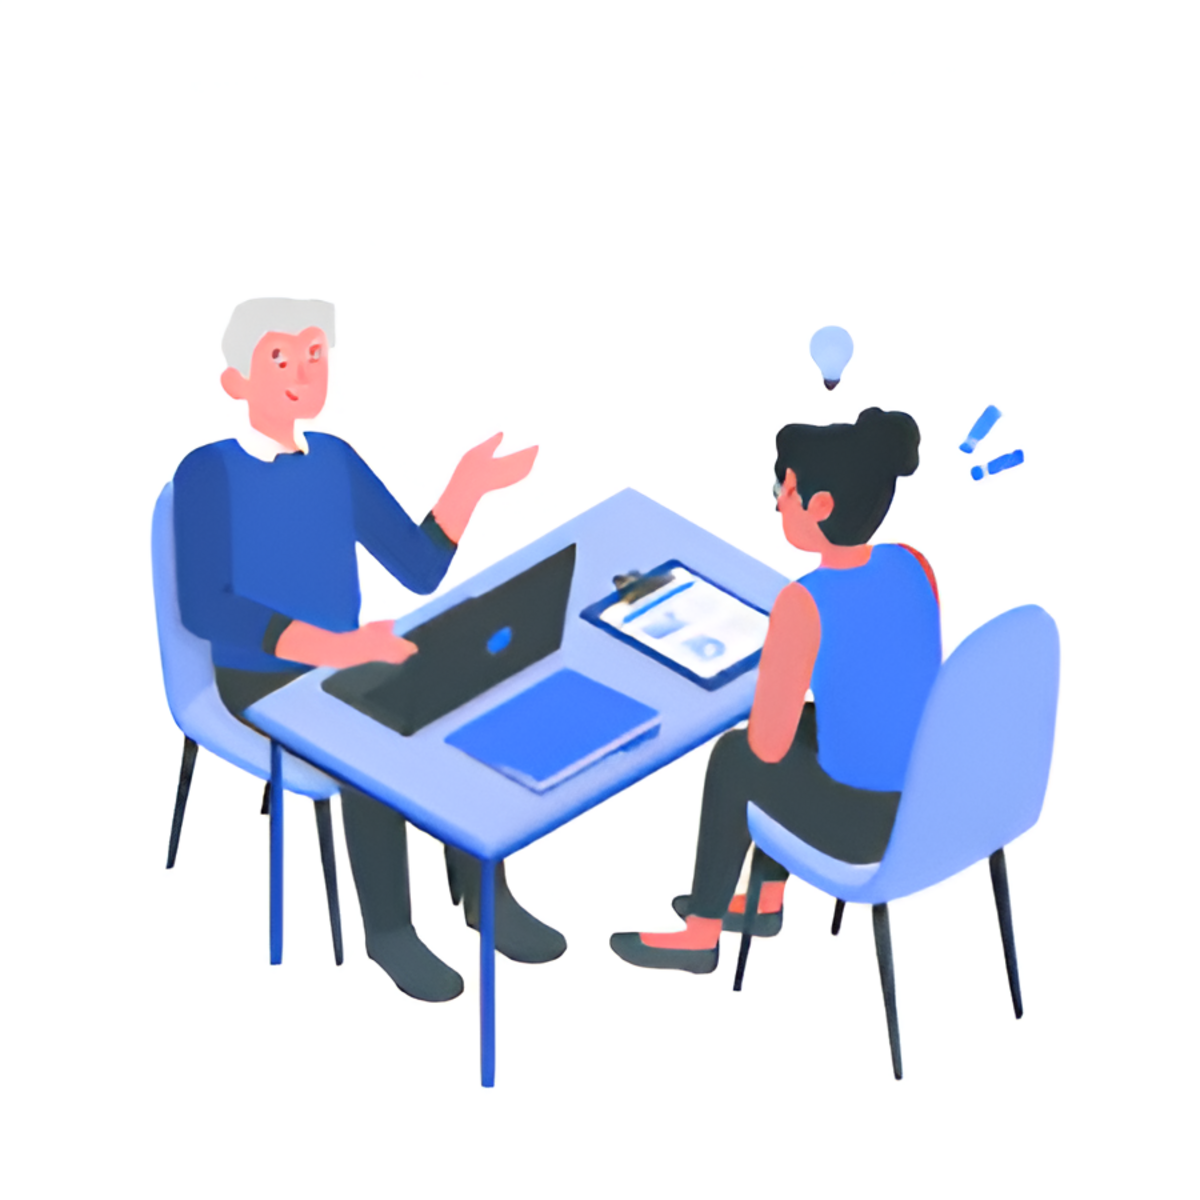

# **Overview of Problem Statement**

The primary objective of this project is to analyze the Placement Prediction Dataset to understand the key factors influencing a student's placement status. This dataset includes various academic and extracurricular attributes, such as CGPA, internships, projects, aptitude test scores, and soft skills ratings, which contribute to a student's employability. By leveraging these insights, the project aims to build a predictive model to determine whether a student will be placed or not, helping institutions and students enhance their preparation strategies.



**Objective**

The goal of this project is to analyze the Placement Prediction dataset to identify critical factors affecting a student's placement status and build a machine learning model to predict whether a student will be placed.

**Data Description Source:**   https://drive.google.com/file/d/1Z5aYv6k5FTl4aOsbz3XoWiQr56Zn2w1-/view?usp=sharing




**Target Variable:**

PlacementStatus (Binary: Placed or Not Placed).

**Features:**

**CGPA:** Overall grades achieved by the student.

**Internships:** Number of internships completed by the student.

**Projects:** Number of projects completed.

**Workshops/Certifications:** Courses taken by the student to upskill.

**AptitudeTestScore:** Measures the student's quantitative and logical abilities.

**SoftSkillsRating:** Communication skills rating, which plays a vital role in recruitment.

**ExtraCurricularActivities:** Indicates student participation in non-academic activities.

**PlacementTraining:** Binary indicator for whether the student has undergone placement training.

**SSC_Marks:** Marks obtained in Senior Secondary (10th grade).

**HSC_Marks:** Marks obtained in Higher Secondary (12th grade).

**PlacementStatus:**Target variable indicating if the student is placed  or not.

In [54]:
# Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,f1_score,recall_score,roc_curve, auc
from sklearn.model_selection import GridSearchCV
import joblib

In [55]:
# Reading  the dataset
df=pd.read_csv("/content/placementdata.csv")

In [56]:
df.head()

StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0                 65               4.4                        No   
1                 90               4.0                       Yes   
2                 82               4.8                       Yes   
3                 85               4.4                       Yes   
4                 86               4.5                       Yes   

  PlacementTraining  SSC_Marks  HSC_Marks PlacementStatus  
0                No         61         79       NotPlaced  
1               Yes         78         82          Placed  
2                No         79         80       NotPlaced  
3               Yes         81         80          Placed  
4               Yes         74         88          Placed

# **Statistical Information**

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


**Total Entries:** The dataset contains 10,000 entries, providing a substantial sample size for analysis.

**Column Count:** There are 12 columns representing various academic, training, and placement-related features.

**Data Types:**
The dataset consists of a mix of numerical and categorical data:

**Numerical Columns :** These include CGPA, Internships, Projects, Workshops/Certifications, AptitudeTestScore, SoftSkillsRating, SSC_Marks, and HSC_Marks. These features provide key insights into a student's academic and technical skills.

**Categorical Columns :**Features like ExtracurricularActivities, PlacementTraining, and PlacementStatus are categorical and suitable for classification tasks.

**Binary Columns:** PlacementStatus is the target variable, indicating whether a student is placed or NotPlaced.

**Missing Values:**
The dataset is complete, with no missing values, ensuring a clean and structured dataset for predictive modeling.

In [58]:
df.shape

(10000, 12)

In [59]:

df.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [60]:
df.duplicated().sum()

0

In [61]:
df.describe()

StudentID          CGPA   Internships      Projects  \
count  10000.00000  10000.000000  10000.000000  10000.000000   
mean    5000.50000      7.698010      1.049200      2.026600   
std     2886.89568      0.640131      0.665901      0.867968   
min        1.00000      6.500000      0.000000      0.000000   
25%     2500.75000      7.400000      1.000000      1.000000   
50%     5000.50000      7.700000      1.000000      2.000000   
75%     7500.25000      8.200000      1.000000      3.000000   
max    10000.00000      9.100000      2.000000      3.000000   

       Workshops/Certifications  AptitudeTestScore  SoftSkillsRating  \
count              10000.000000       10000.000000      10000.000000   
mean                   1.013200          79.449900          4.323960   
std                    0.904272           8.159997          0.411622   
min                    0.000000          60.000000          3.000000   
25%                    0.000000          73.000000          4.000000   
50%                    1.000000          80.000000          4.400000   
75%                    2.000000          87.000000          4.700000   
max                    3.000000          90.000000          4.800000   

          SSC_Marks     HSC_Marks  
count  10000.000000  10000.000000  
mean      69.159400     74.501500  
std       10.430459      8.919527  
min       55.000000     57.000000  
25%       59.000000     67.000000  
50%       70.000000     73.000000  
75%       78.000000     83.000000  
max       90.000000     88.000000

**Statistical Summary:**

This dataset provides insights into student placement based on academic and skill-related factors.

**Below is the statistical summary of key numerical features:**

**CGPA:**

The average CGPA is 7.70.
Most students have a CGPA between 7.4 and 8.2 (25th–75th percentile).

**Internships:**

Students have completed 0 to 2 internships, with an average of 1 internship.
Most students have 1 internship, indicating limited variation.

**Projects:**

The number of projects ranges from 0 to 3, with an average of 2 projects.
50% of students have 2 or more projects, which could be an important factor in placement.

**Workshops/Certifications:**

Students have participated in 0 to 3 workshops/certifications, with an average of 1.
The 75th percentile shows 2 workshops, meaning some students are more engaged in upskilling.

**Aptitude Test Score:**

Scores range from 60 to 90, with an average of 79.45.
The 50th percentile (median) is 80, meaning half the students scored 80 or higher.

**Soft Skills Rating:**

Ratings range from 3.0 to 4.8, with an average of 4.32.
Most students score between 4.0 and 4.7, indicating relatively strong soft skills.

**SSC and HSC Marks:**

SSC Marks range from 55 to 90, with an average of 69.16.
HSC Marks range from 57 to 88, with an average of 74.50.


The dataset suggests that CGPA, projects, aptitude scores, and soft skills may play a key role in placement.
There is low variation in internships and workshops, indicating students have similar exposure levels.
The absence of outliers makes this dataset well-balanced for predictive modeling.











In [62]:
df['PlacementStatus'].value_counts()

PlacementStatus
NotPlaced    5803
Placed       4197
Name: count, dtype: int64

Checking for Target columns value counts to determine if the classes are balanced or not. Here it is unbalanced so need to do resampling technique called **SMOTE**.

**Checking for Outliers:
Using a boxplot to visually identify potential outliers in numerical columns.**

In [63]:
num_columns=df.select_dtypes(include=['number']).drop(columns=['StudentID'])

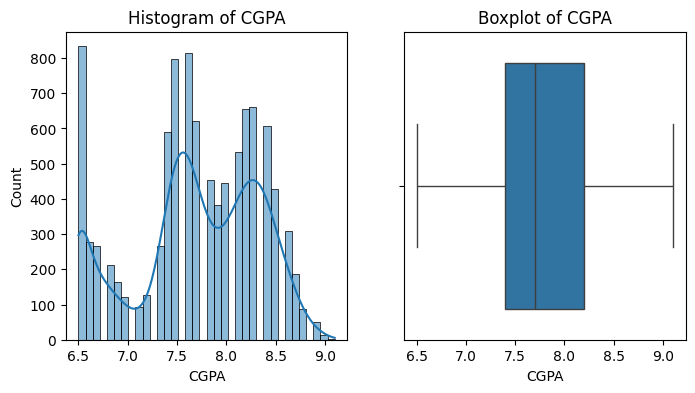

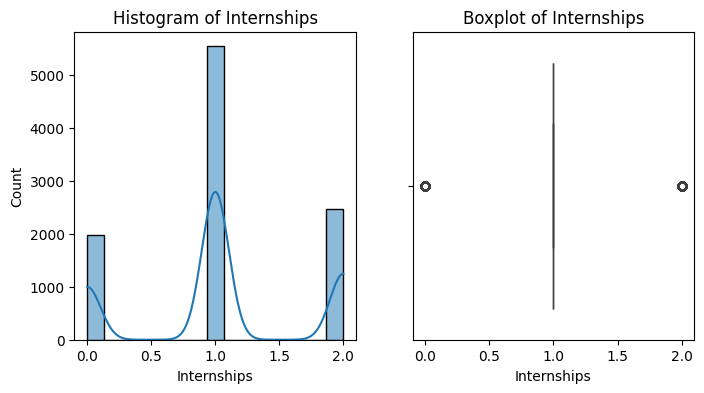

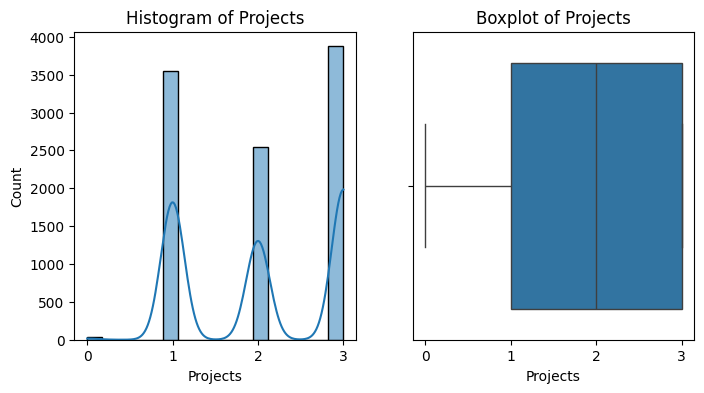

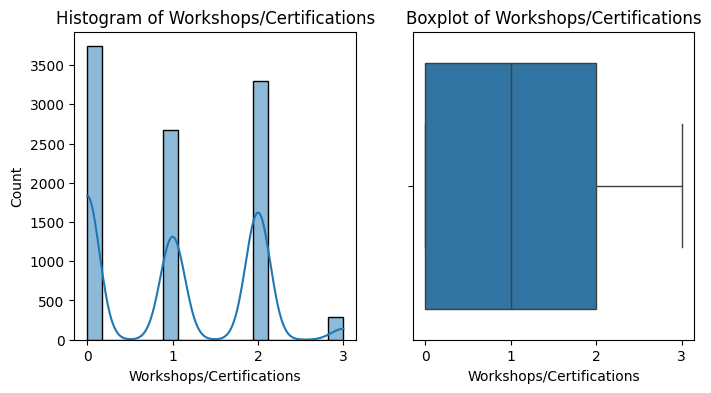

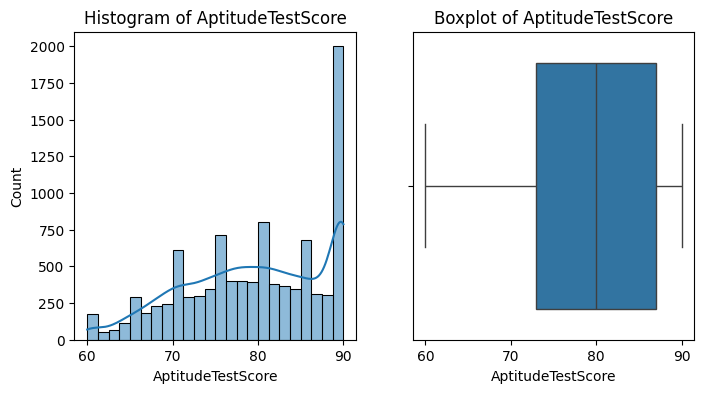

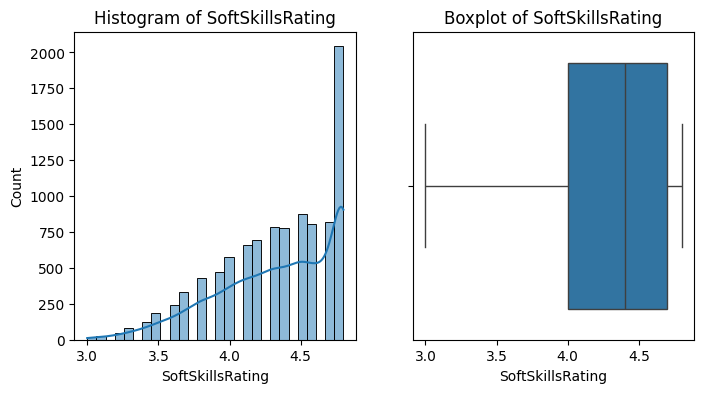

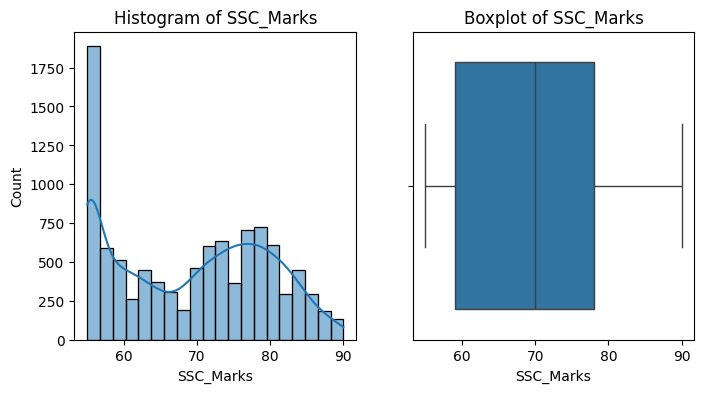

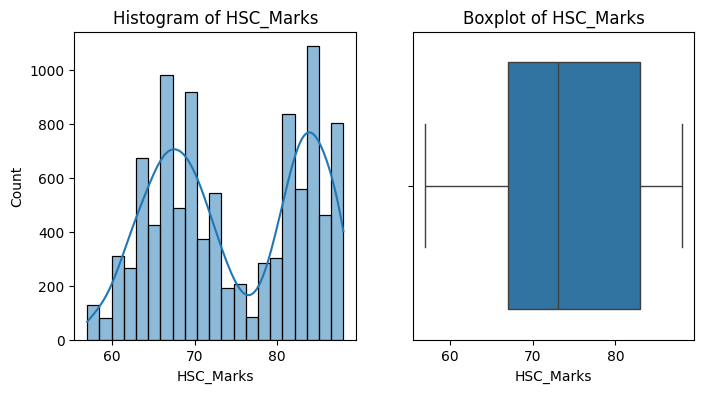

In [64]:
#checking for outliers
for column in num_columns:
    plt.figure(figsize=(8, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')


Boxplot indicates there is no potential outliers in the dataset.

**Checking skewness**

Skewness indicates how asymmetric the data distribution is. If the data is highly skewed, we can use log transformation or square root transformation to make it more normal (bell-shaped).

In [65]:
skewness_values = num_columns.skew()
print("Skewness of numerical columns:")
print(skewness_values)

Skewness of numerical columns:
CGPA                       -0.402713
Internships                -0.055429
Projects                   -0.078830
Workshops/Certifications    0.204570
AptitudeTestScore          -0.355011
SoftSkillsRating           -0.676326
SSC_Marks                   0.034382
HSC_Marks                  -0.000985
dtype: float64


Softskill rating is moderately left skewed but still not extreme. Others are nearly symmetric or slightly skewed, so no need of transformation.


In [66]:
print(df['Internships'].value_counts())
print(df['Projects'].value_counts())

Internships
1    5542
2    2475
0    1983
Name: count, dtype: int64
Projects
3    3873
1    3547
2    2550
0      30
Name: count, dtype: int64


### **Exploratory Data Analysis**
**Countplot for Categorical Variables**

<ipython-input-67-00f4272a86db>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PlacementStatus', data=df, palette='viridis')


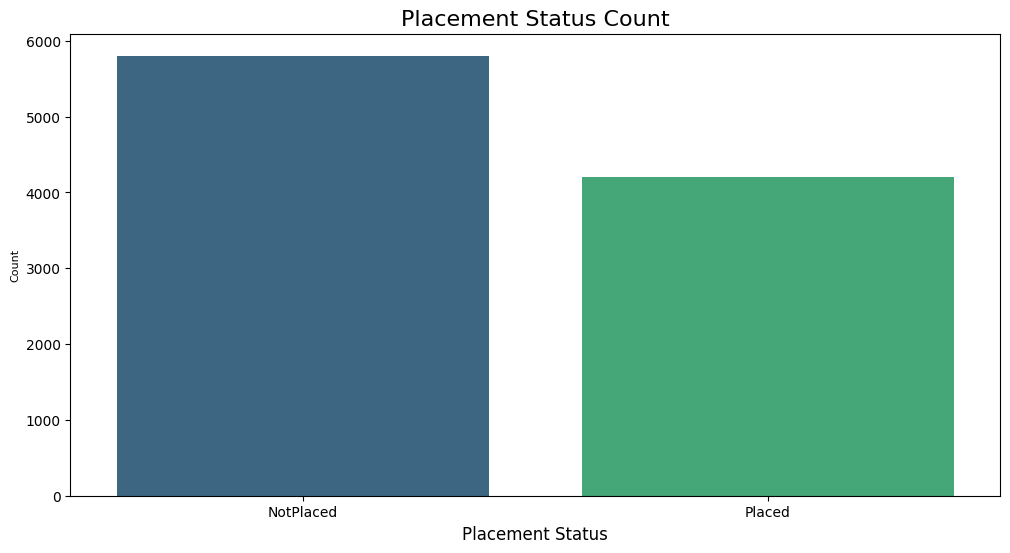

In [67]:
plt.figure(figsize=(12, 6))
sns.countplot(x='PlacementStatus', data=df, palette='viridis')
plt.title('Placement Status Count', fontsize=16)
plt.xlabel('Placement Status', fontsize=12)
plt.ylabel('Count', fontsize=8)
plt.show()

This plot shows the count of not placed is more comparing with the placed students.

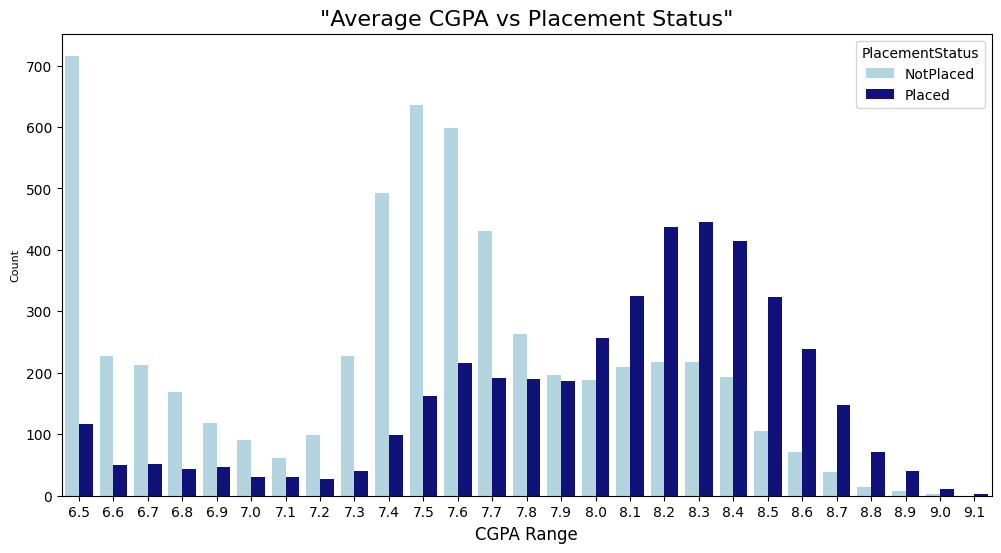

In [68]:
# Define custom colors
custom_palette = {"Placed": "darkblue", "NotPlaced": "lightblue"}
plt.figure(figsize=(12, 6))
sns.countplot(x='CGPA',hue='PlacementStatus', data=df, palette=custom_palette)
plt.title('"Average CGPA vs Placement Status"', fontsize=16)
plt.xlabel('CGPA Range', fontsize=12)
plt.ylabel('Count', fontsize=8)
plt.show()


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


# **Stacked Bar Chart:**
Placement Training impact on Placement.

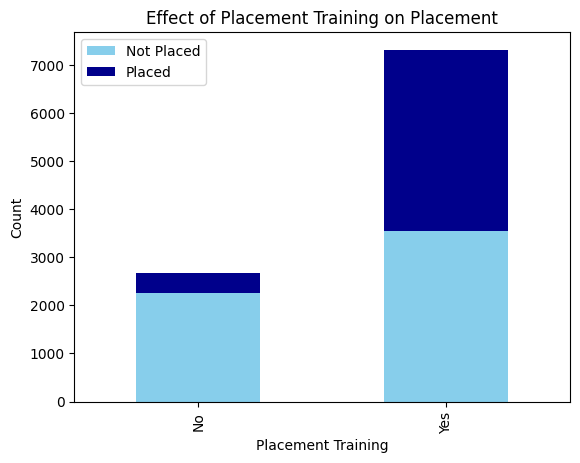

In [70]:
pd.crosstab(df["PlacementTraining"], df["PlacementStatus"]).plot(kind="bar", stacked=True, color=["skyblue", "darkblue"])
plt.title("Effect of Placement Training on Placement")
plt.xlabel("Placement Training")
plt.ylabel("Count")
plt.legend(["Not Placed", "Placed"])
plt.show()


Students who participated in placement training had a higher chance of getting placed compared to those who didn’t. This suggests that placement training plays a significant role in improving students' job opportunities

 **Scatter plot**

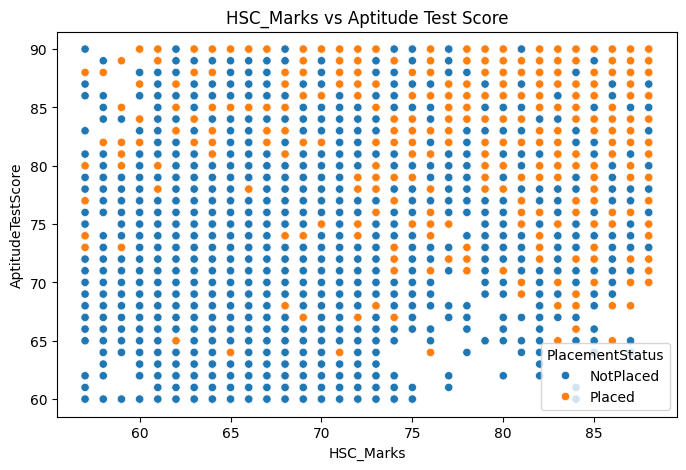

In [71]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="HSC_Marks", y="AptitudeTestScore", hue="PlacementStatus", data=df)
plt.title("HSC_Marks vs Aptitude Test Score")
plt.show()


The Higher the HSC Marks the probability of getting placed is more.

**Pie Chart**

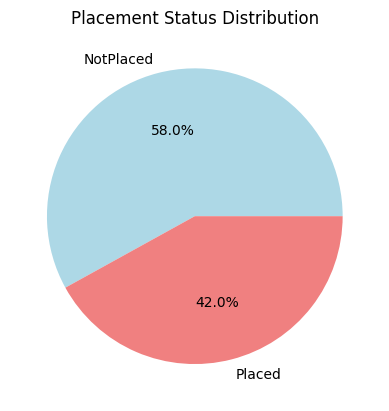

In [72]:
df["PlacementStatus"].value_counts().plot.pie(autopct="%1.1f%%", colors=['lightblue', 'lightcoral'])
plt.title("Placement Status Distribution")
plt.ylabel("")
plt.show()

**Pair Plot**

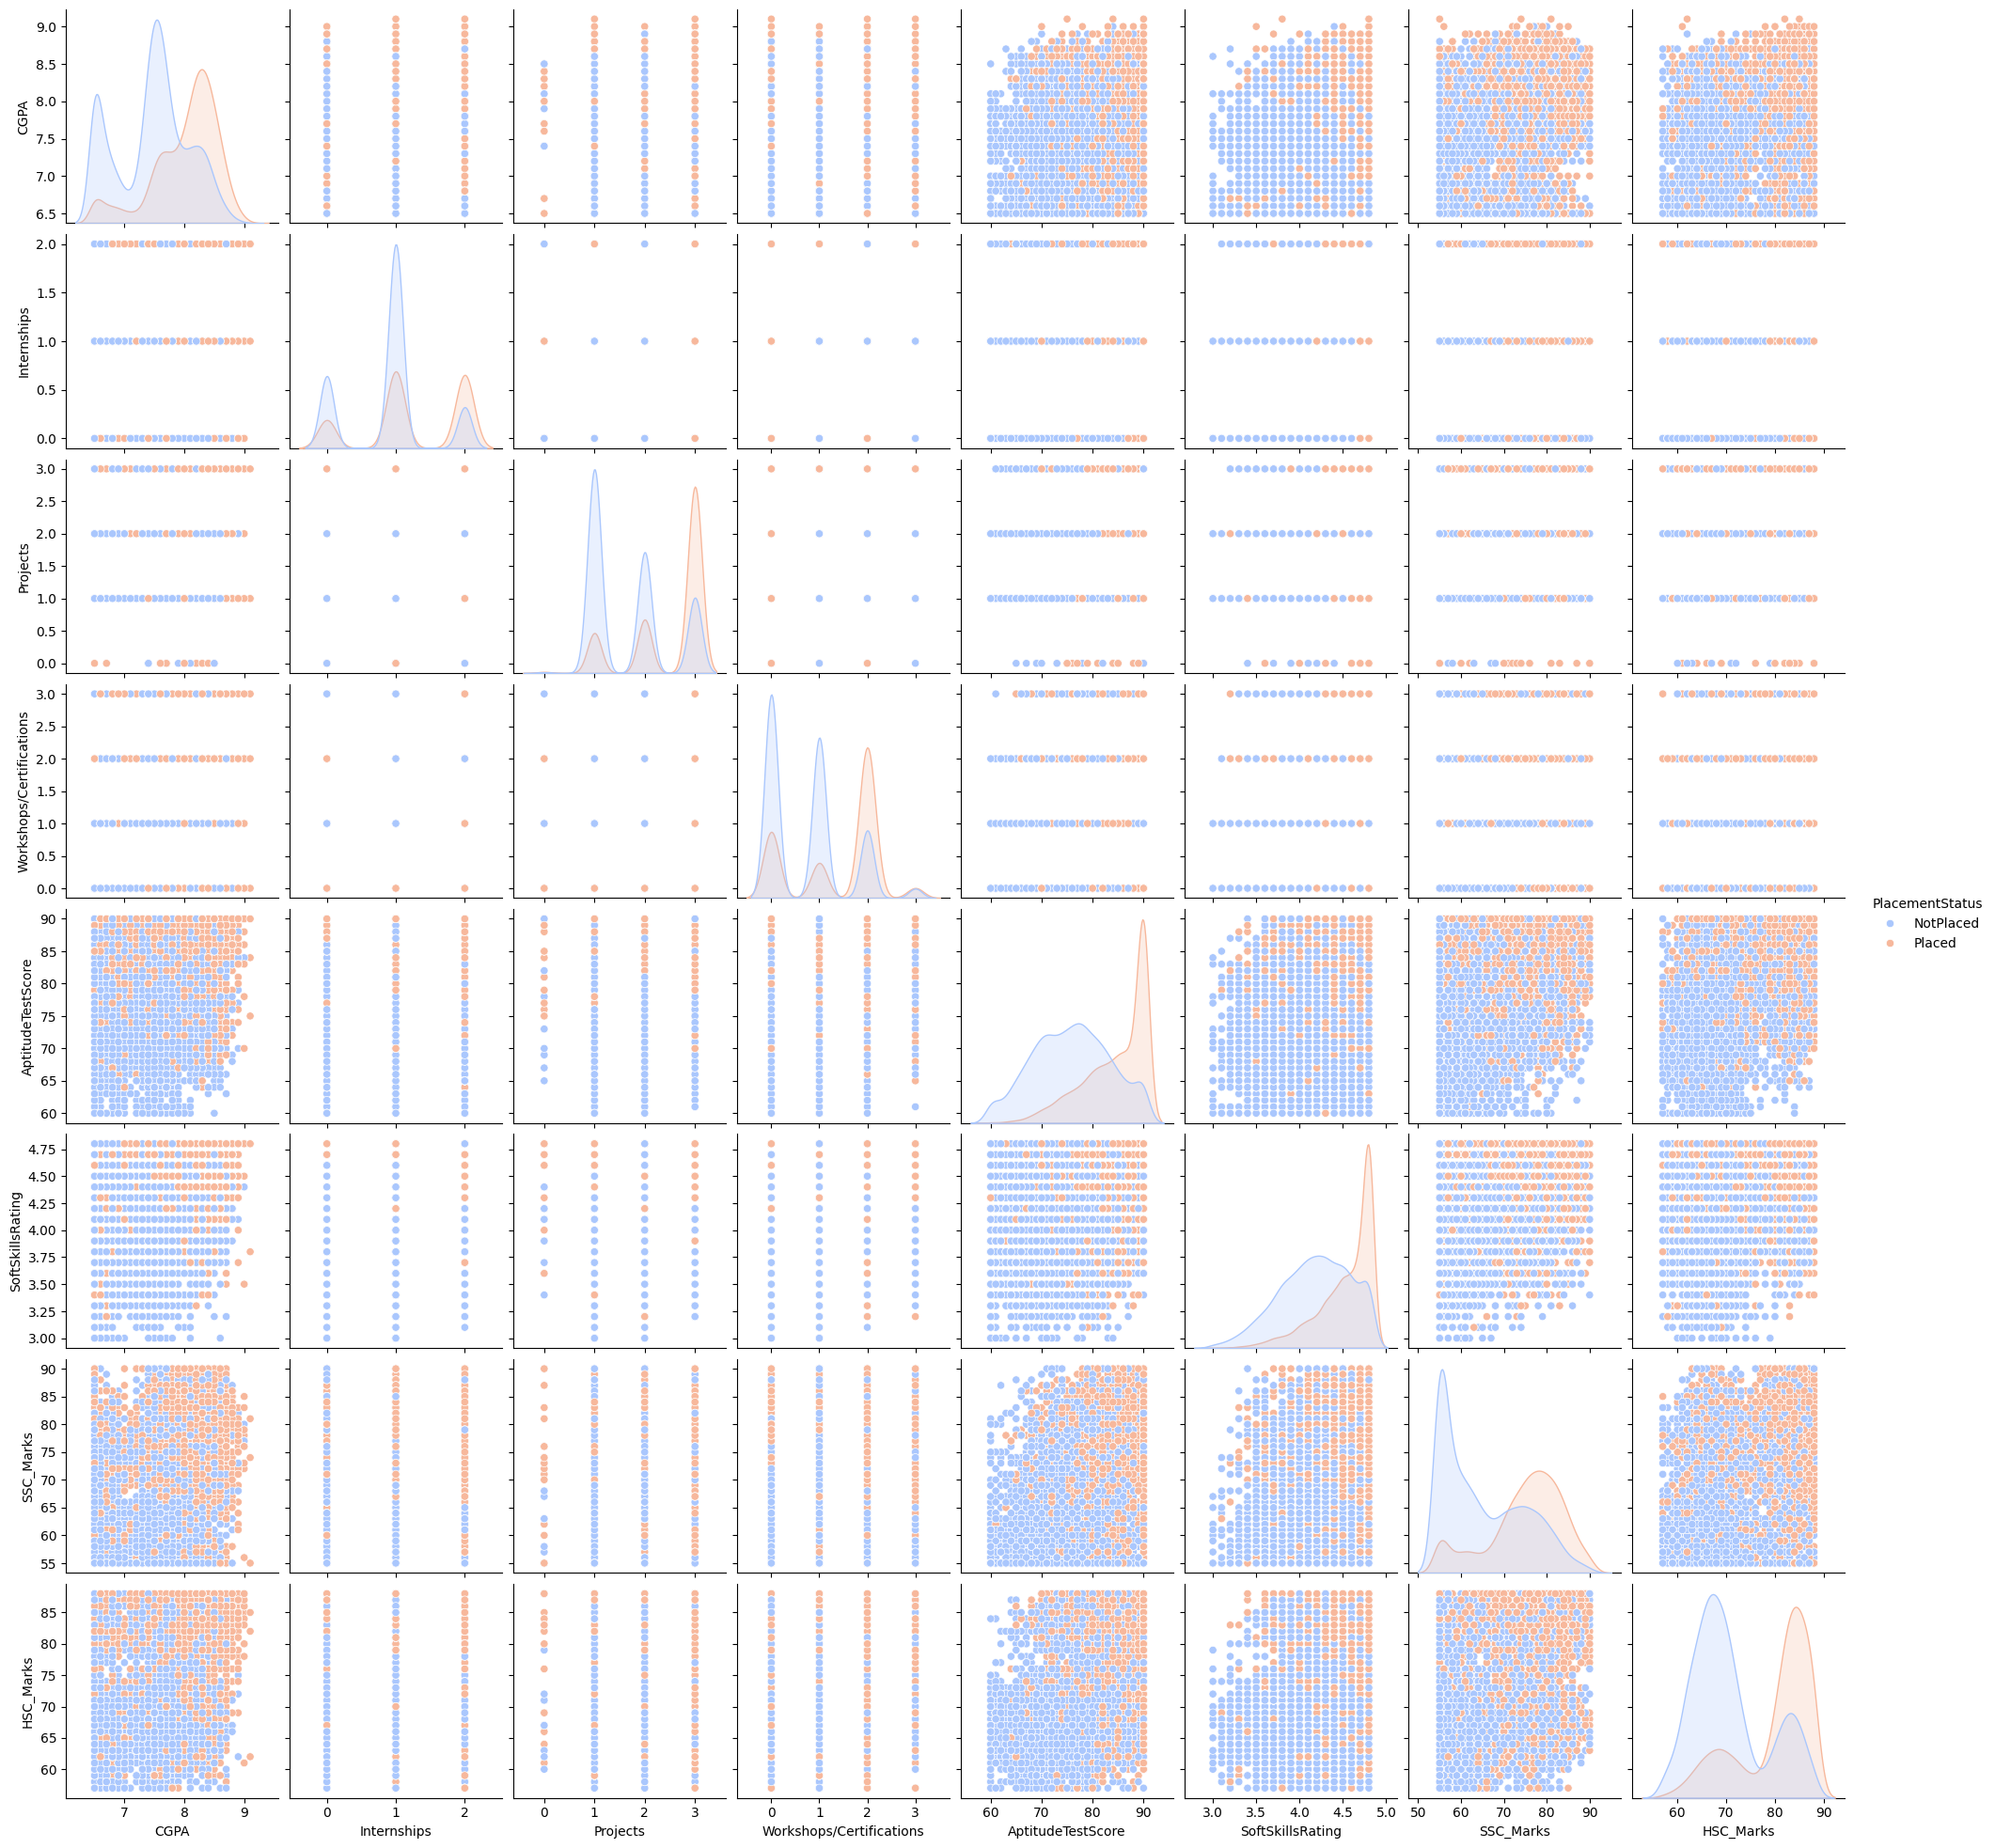

In [73]:
sns.pairplot(df.drop(columns=["StudentID"]), hue="PlacementStatus", palette="coolwarm")
plt.show()

In [74]:
corr = num_columns.corr()
print(corr)

                              CGPA  Internships  Projects  \
CGPA                      1.000000     0.280601  0.435928   
Internships               0.280601     1.000000  0.309196   
Projects                  0.435928     0.309196  1.000000   
Workshops/Certifications  0.349686     0.279110  0.377865   
AptitudeTestScore         0.461250     0.320725  0.540339   
SoftSkillsRating          0.383547     0.273691  0.450294   
SSC_Marks                 0.404971     0.279837  0.499421   
HSC_Marks                 0.462313     0.317149  0.535708   

                          Workshops/Certifications  AptitudeTestScore  \
CGPA                                      0.349686           0.461250   
Internships                               0.279110           0.320725   
Projects                                  0.377865           0.540339   
Workshops/Certifications                  1.000000           0.388061   
AptitudeTestScore                         0.388061           1.000000   
SoftSkillsRa

**Correlation Heatmap**

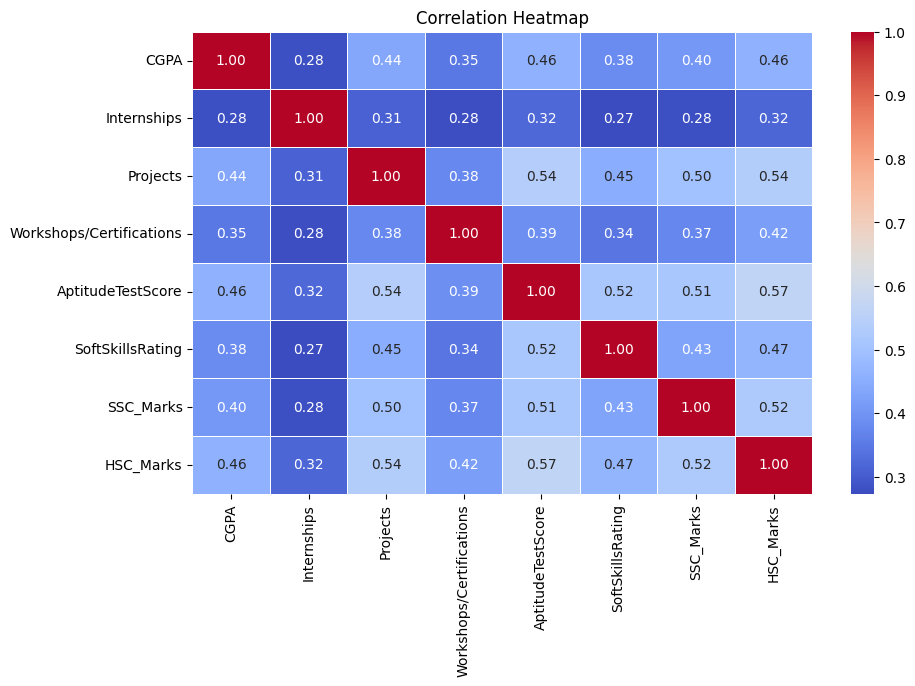

In [75]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


#**Key Insights from the Correlation Matrix**

**Strong Positive Correlations:**


 **CGPA vs. HSC_Marks (0.46) and SSC_Marks (0.40)**

 * Higher school marks tend to be associated with a higher CGPA.

**AptitudeTestScore vs. HSC_Marks (0.56) and SSC_Marks (0.51)**

* Students who scored well in school also tend to perform better in aptitude tests.

**Projects vs. AptitudeTestScore (0.54)**
 * More project experience is linked to better aptitude test scores.

**Moderate Positive Correlations:**

SoftSkillsRating vs. CGPA (0.38)
* Students with higher CGPA may also have better soft skills.

**Projects vs. SSC_Marks (0.49) and HSC_Marks (0.53)**
* More projects are associated with better academic performance.

**Internships vs. AptitudeTestScore (0.32)**
* Students with more internships tend to score better in aptitude tests.

**Weak Correlations:**

Workshops/Certifications have weak correlations with other variables (below 0.4), suggesting that participation in workshops isn't strongly linked to other performance indicators.

Internships have a weak correlation with CGPA (0.28), meaning internship experience doesn't necessarily indicate a high CGPA.

**If correlation values are above 0.75, it indicates a potential multicollinearity problem. Based on this correlation data, none of the features have a correlation exceeding 0.75, meaning there is no multicollinearity.**

**Feature Engineering**

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [77]:
#Selecting categorical column
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus'], dtype='object')


In [78]:
print(df[["ExtracurricularActivities", "PlacementTraining"]])


     ExtracurricularActivities PlacementTraining
0                           No                No
1                          Yes               Yes
2                          Yes                No
3                          Yes               Yes
4                          Yes               Yes
...                        ...               ...
9995                       Yes                No
9996                        No                No
9997                       Yes               Yes
9998                       Yes               Yes
9999                        No                No

[10000 rows x 2 columns]


In [79]:
# Label Encoding
df["ExtracurricularActivities"] = df["ExtracurricularActivities"].map({"Yes": 1, "No": 0})
df["PlacementTraining"] = df["PlacementTraining"].map({"Yes": 1, "No": 0})
df["PlacementStatus"] = df["PlacementStatus"].map({"Placed": 1, "NotPlaced": 0})

print(df.head())


   StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating  ExtracurricularActivities  \
0                 65               4.4                          0   
1                 90               4.0                          1   
2                 82               4.8                          1   
3                 85               4.4                          1   
4                 86               4.5                          1   

   PlacementTraining  SSC_Marks  HSC_Marks  PlacementStatus  
0                  0         61         79                0  
1                  1         78   

Label Encoding is particularly useful for categorical variables with a limited number of unique values. Since ExtracurricularActivities, PlacementTraining, and PlacementStatus each have binary choices (e.g., "Yes" or "No" for the first two, and "Placed" or "NotPlaced" for the last), label encoding is an appropriate method.

In [80]:
df = df.drop(columns=['StudentID'])

In [81]:
print(df.dtypes)

CGPA                         float64
Internships                    int64
Projects                       int64
Workshops/Certifications       int64
AptitudeTestScore              int64
SoftSkillsRating             float64
ExtracurricularActivities      int64
PlacementTraining              int64
SSC_Marks                      int64
HSC_Marks                      int64
PlacementStatus                int64
dtype: object


In [82]:
df["PlacementStatus"].value_counts()


PlacementStatus
0    5803
1    4197
Name: count, dtype: int64

Original dataset shape Counter({0: 5803, 1: 4197})
Resampled dataset shape Counter({0: 5803, 1: 5803})
PlacementStatus
0    5803
1    5803
Name: count, dtype: int64


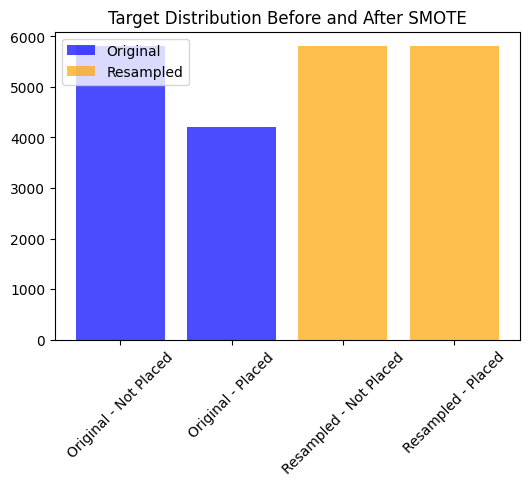

In [83]:
X = df.drop('PlacementStatus', axis=1)  # Features
y = df['PlacementStatus']  # Target variable

# Applying SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Checking the distribution of the resampled data
print(f"Original dataset shape {Counter(y)}")
print(f"Resampled dataset shape {Counter(y_resampled)}")

# Converting the resampled data back to a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['PlacementStatus'] = y_resampled

# Check new  distribution of target variable
print(df_resampled['PlacementStatus'].value_counts())

# visualization
plt.figure(figsize=(6, 4))
plt.bar(["Original - Not Placed", "Original - Placed"], Counter(y).values(), color='blue', alpha=0.7, label="Original")
plt.bar(["Resampled - Not Placed", "Resampled - Placed"], Counter(y_resampled).values(), color='orange', alpha=0.7, label="Resampled")
plt.xticks(rotation=45)
plt.title("Target Distribution Before and After SMOTE")
plt.legend()
plt.show()

In [84]:
##Feature Selection

# Separate features and target variable
X = df_resampled.drop('PlacementStatus', axis=1)  # Features excluding the target
y = df_resampled['PlacementStatus']  # Target column

# Create a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print the feature importance DataFrame
print(feature_importance_df)


                     Feature  Importance
9                  HSC_Marks    0.210686
4          AptitudeTestScore    0.165671
0                       CGPA    0.144705
8                  SSC_Marks    0.142300
5           SoftSkillsRating    0.105206
6  ExtracurricularActivities    0.083138
2                   Projects    0.048930
3   Workshops/Certifications    0.045699
1                Internships    0.032509
7          PlacementTraining    0.021155


Selected Features:
                     Feature  Importance
9                  HSC_Marks    0.210686
4          AptitudeTestScore    0.165671
0                       CGPA    0.144705
8                  SSC_Marks    0.142300
5           SoftSkillsRating    0.105206
6  ExtracurricularActivities    0.083138
2                   Projects    0.048930
3   Workshops/Certifications    0.045699
1                Internships    0.032509


<ipython-input-85-fa0a1d1f2a3d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=selected_features['Importance'], y=selected_features['Feature'], palette="viridis")


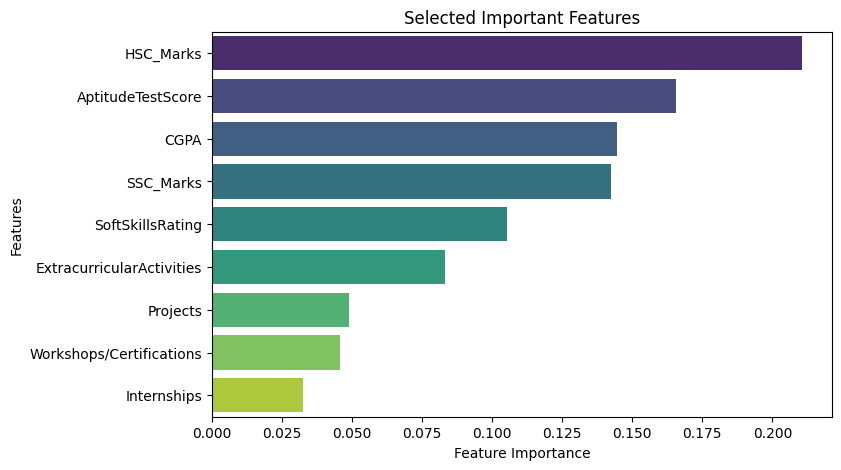

In [85]:
# Set threshold value
threshold = 0.03

# Select features with importance above the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]

print("Selected Features:")
print(selected_features)

# If you want to use the selected features for your dataset X
X_selected = X[selected_features['Feature'].values]

# Visualization: Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=selected_features['Importance'], y=selected_features['Feature'], palette="viridis")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Selected Important Features")
plt.show()


We found the most important factors that affect whether students get placed.

HSC Marks are the most important, with a score of 0.2107.
Aptitude Test Score is also significant, scoring 0.1657.   
CGPA is important too, with a score of 0.1447.   
SSC Marks have a score of 0.1423, showing their relevance.   
Soft Skills Rating matters, with a score of 0.1052.   
Extracurricular Activities have some influence, scoring 0.0831.
Projects are relevant but less so, with a score of 0.0489.
Workshops/Certifications contribute with a score of 0.0457.
Internships have a minor effect, scoring 0.0325.   
These factors can help improve student placements by focusing on what matters most.

**To train and evaluate our model, we split the dataset into training (80%) and testing (20%)**

In [86]:
# Define features (X) and target (y) from the resampled dataset
X = df_resampled.drop(columns=['PlacementStatus'])  # Features
y = df_resampled['PlacementStatus']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



Training set shape: (9284, 10) (9284,)
Testing set shape: (2322, 10) (2322,)


In [87]:
#Apply StandardScaler  Feature Scaling (Standardization)
#The dataset has varying numerical ranges (eg:- CGPA ranges from 0-10, while AptitudeTestScore is 0-100), we apply StandardScaler to normalize them

# Initialize the scaler
scalar = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scalar.fit_transform(X_train)

# Transform the testing data
X_test_scaled = scalar.transform(X_test)


# **Build the ML Model:**

**Support Vector Machine (SVM):**

* SVM is a method that tries to find the best line (or hyperplane) that separates different classes (like placed and not placed students).
* SVM works well with complex data, helping to classify students based on features like grades and training participation.

**Decision Tree:**

* A decision tree uses a tree-like structure where each decision leads to different outcomes (like placed or not placed).
*  Decision trees are easy to understand and visualize. They show how different factors affect placement decisions.

**Gaussian Naive Bayes:**

* This is a simple and fast method that assumes features follow a normal distribution (like scores).
* If the data is somewhat normally distributed, this method can quickly predict placements based on scores and activities.

**Random Forest:**

* Random Forest combines many decision trees to make predictions more accurate and reliable.
* It reduces errors and is robust against noisy data, making it suitable for complex datasets like student placements.

**K-Nearest Neighbors (K-NN):**

* K-NN classifies a student based on how similar they are to their nearest neighbors in the feature space.
* It’s straightforward and intuitive, classifying students based on the similarity of their features (like scores and training).

**Gradient Boosting:**

* Gradient Boosting builds models one after the other, where each new model fixes mistakes made by the previous one.
* It can capture complex patterns in the data, leading to better predictions for placements.

Model: Logistic Regression
Training Accuracy: 0.79
Test Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1161
           1       0.78      0.81      0.80      1161

    accuracy                           0.79      2322
   macro avg       0.79      0.79      0.79      2322
weighted avg       0.79      0.79      0.79      2322



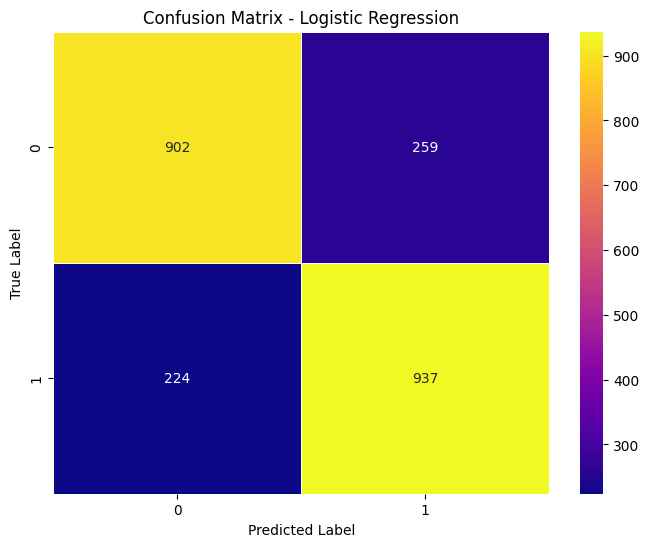

Model: Support Vector Classifier
Training Accuracy: 0.80
Test Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1161
           1       0.79      0.79      0.79      1161

    accuracy                           0.79      2322
   macro avg       0.79      0.79      0.79      2322
weighted avg       0.79      0.79      0.79      2322



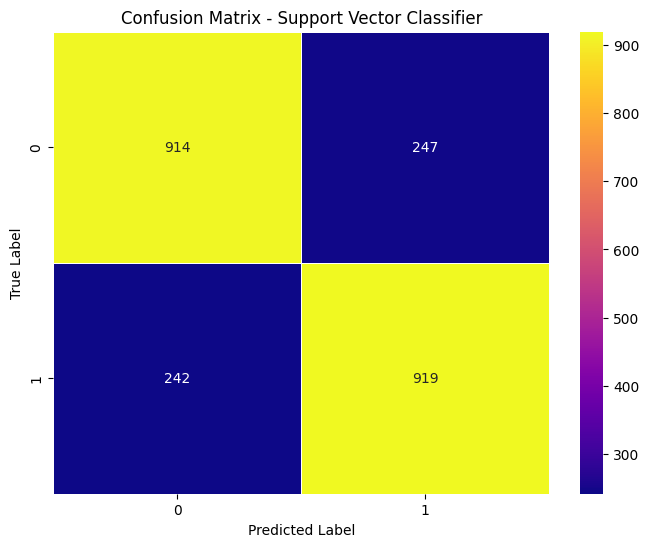

Model: Decision Tree Classifier
Training Accuracy: 1.00
Test Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1161
           1       0.74      0.75      0.74      1161

    accuracy                           0.74      2322
   macro avg       0.74      0.74      0.74      2322
weighted avg       0.74      0.74      0.74      2322



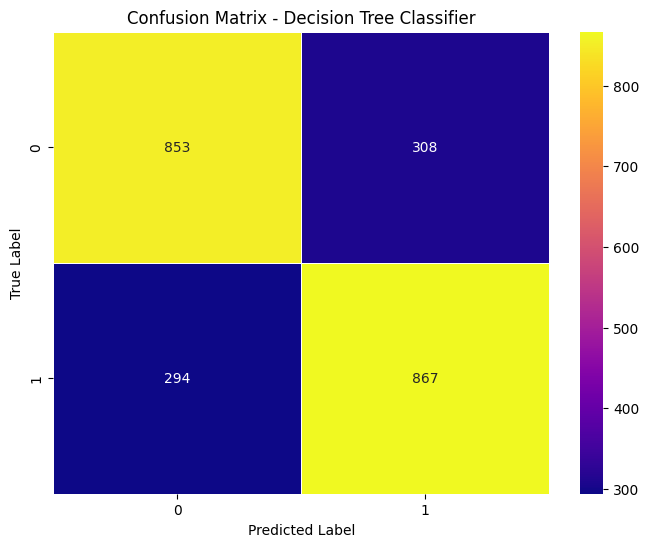

Model: Random Forest Classifier
Training Accuracy: 1.00
Test Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1161
           1       0.81      0.80      0.81      1161

    accuracy                           0.81      2322
   macro avg       0.81      0.81      0.81      2322
weighted avg       0.81      0.81      0.81      2322



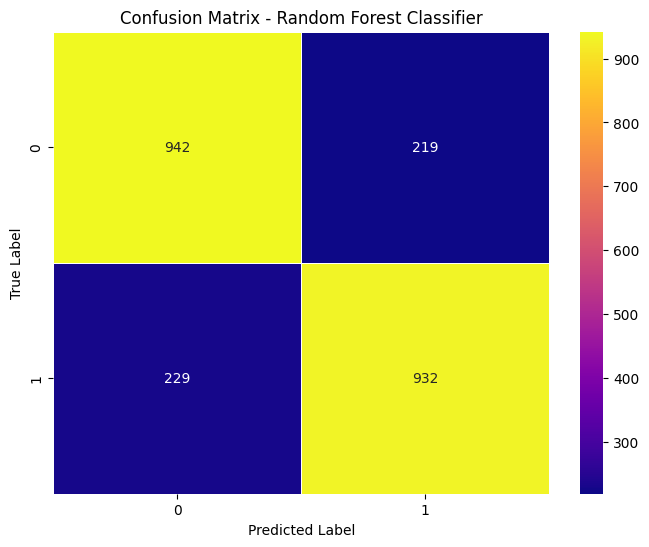

Model: Gradient Boosting Classifier
Training Accuracy: 0.82
Test Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1161
           1       0.80      0.80      0.80      1161

    accuracy                           0.80      2322
   macro avg       0.80      0.80      0.80      2322
weighted avg       0.80      0.80      0.80      2322



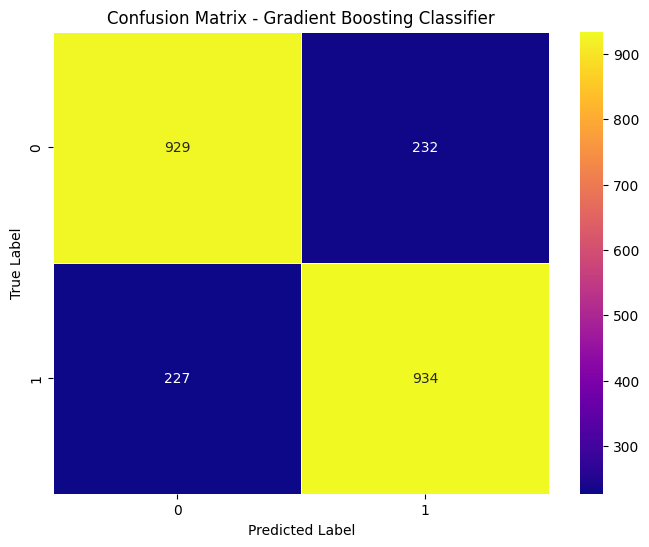

Model: Gaussian Naive Bayes
Training Accuracy: 0.79
Test Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1161
           1       0.79      0.80      0.79      1161

    accuracy                           0.79      2322
   macro avg       0.79      0.79      0.79      2322
weighted avg       0.79      0.79      0.79      2322



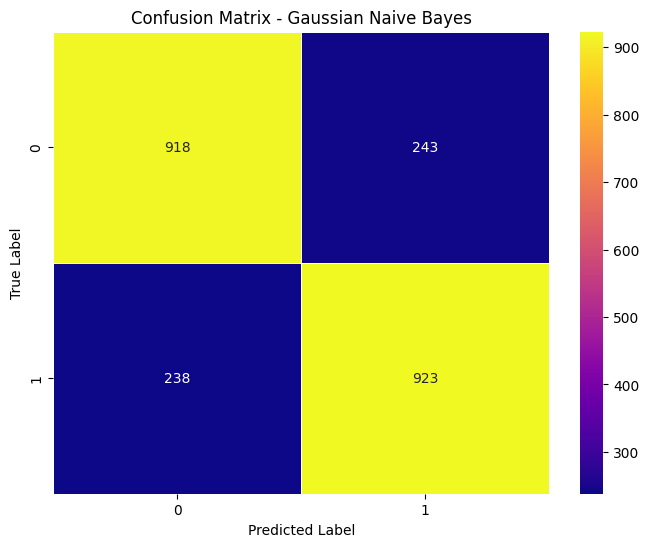

Model: K-Nearest Neighbors
Training Accuracy: 0.84
Test Accuracy: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1161
           1       0.76      0.77      0.77      1161

    accuracy                           0.77      2322
   macro avg       0.77      0.77      0.77      2322
weighted avg       0.77      0.77      0.77      2322



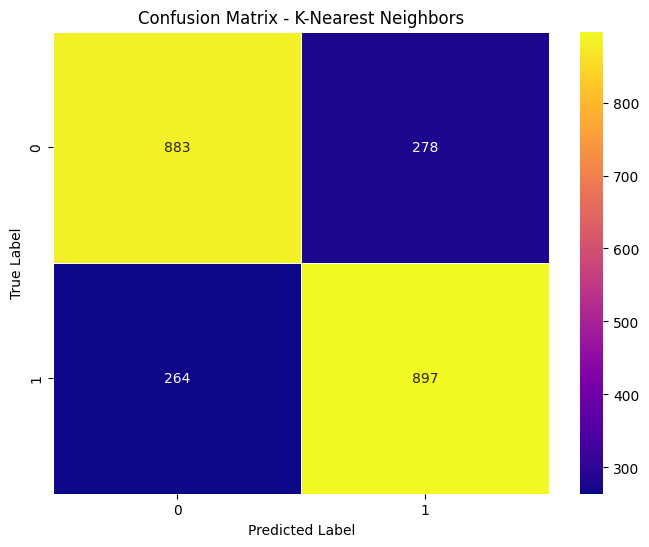

Training and Testing Completed!


In [88]:
from sklearn.naive_bayes import GaussianNB
# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier': SVC(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Store accuracies
train_accuracies = []
test_accuracies = []

# Training and Evaluating Models
for model_name, model in models.items():
    # Fit the model on training data
    model.fit(X_train_scaled, y_train)

    # Training and test accuracy
    train_accuracy = model.score(X_train_scaled, y_train)
    test_accuracy = model.score(X_test_scaled, y_test)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Predictions
    y_pred = model.predict(X_test_scaled)

    # Evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    con_matrix = confusion_matrix(y_test, y_pred)

    # Display results
    print(f"Model: {model_name}")
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(con_matrix, annot=True, fmt="d", cmap="plasma", linewidths=0.5)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

print("Training and Testing Completed!")

**Insights on Model Performance**

* Random Forest Classifier and Gradient Boosting Classifier demonstrated the highest accuracy, both around 80%, showcasing strong predictive capabilities. These models handle non-linearity well and provide reliable predictions.

* Support Vector Classifier (SVC) performed slightly lower at 79%, but still showed consistent results. It remains a good choice, especially for well-separated data points.

* Logistic Regression and Gaussian Naive Bayes both achieved an accuracy of 79%, indicating that a simpler, linear approach is still effective. These models can be useful for interpretability but might struggle with complex patterns.

* Decision Tree Classifier had a lower test accuracy of 75%, despite achieving 100% training accuracy, indicating overfitting. This model may benefit from hyperparameter tuning to improve generalization.

* K-Nearest Neighbors (KNN) performed well with an accuracy of 77%, making it a viable option for further evaluation. However, it tends to be sensitive to dataset size and feature scaling.










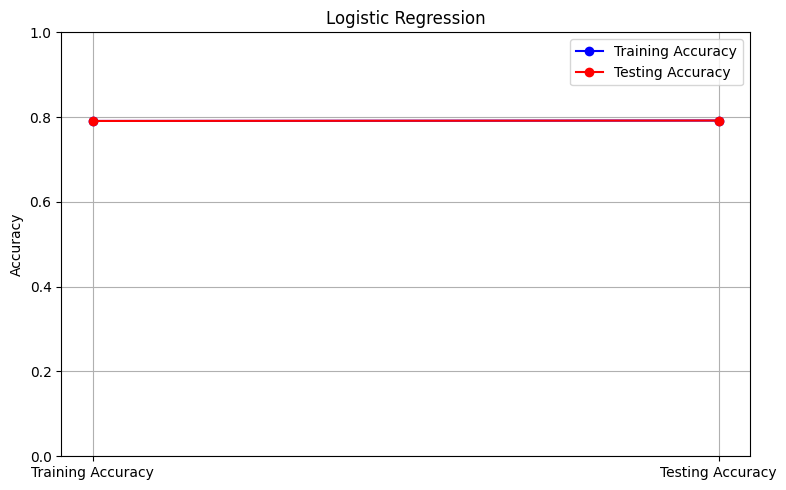

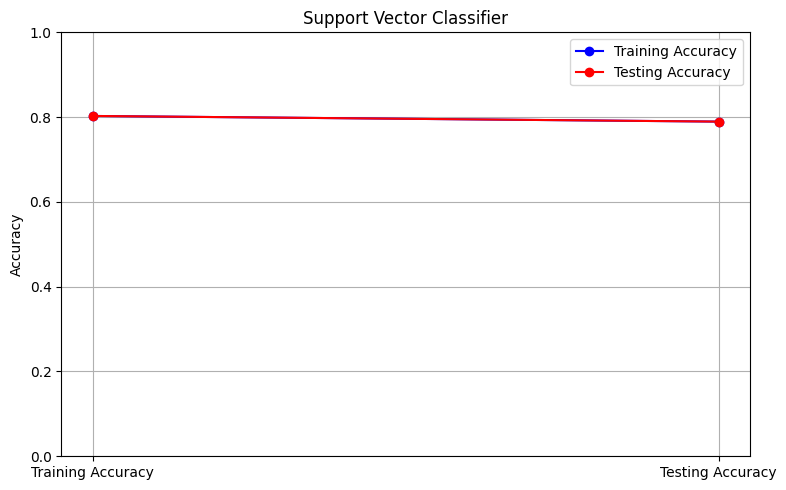

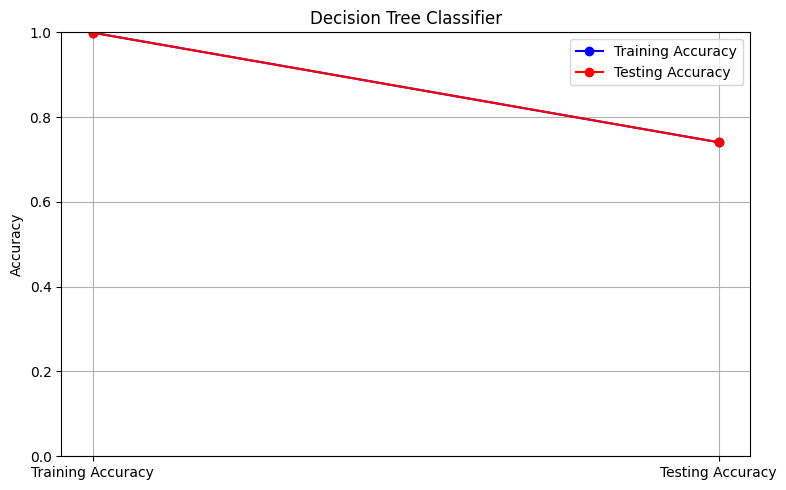

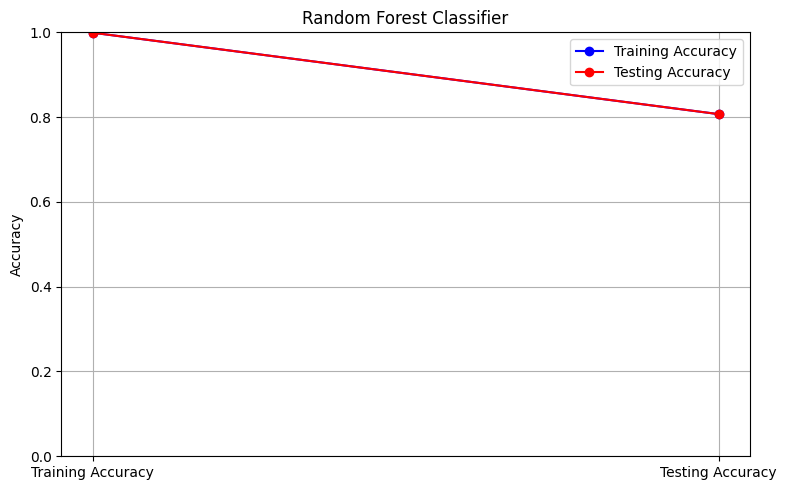

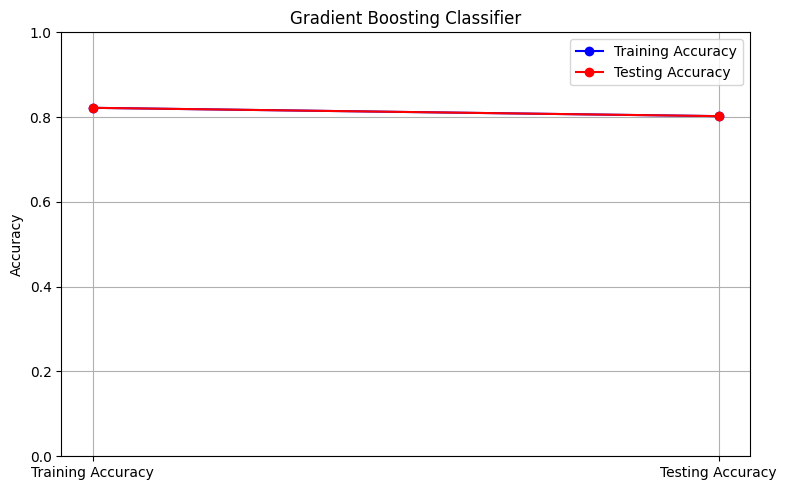

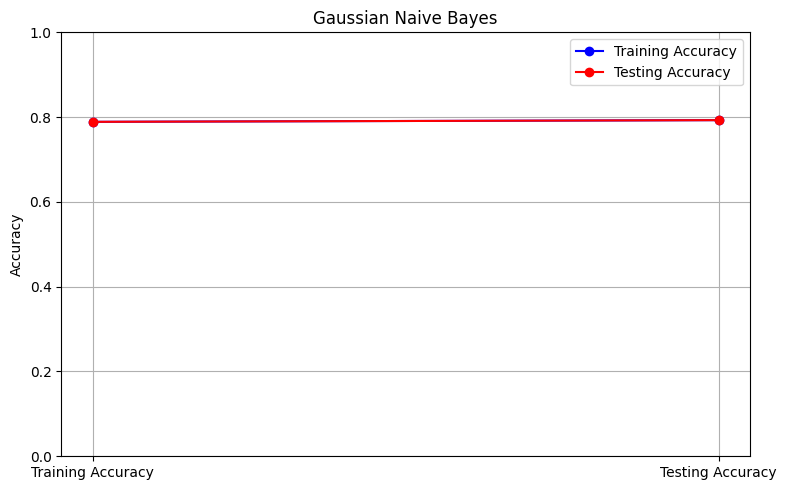

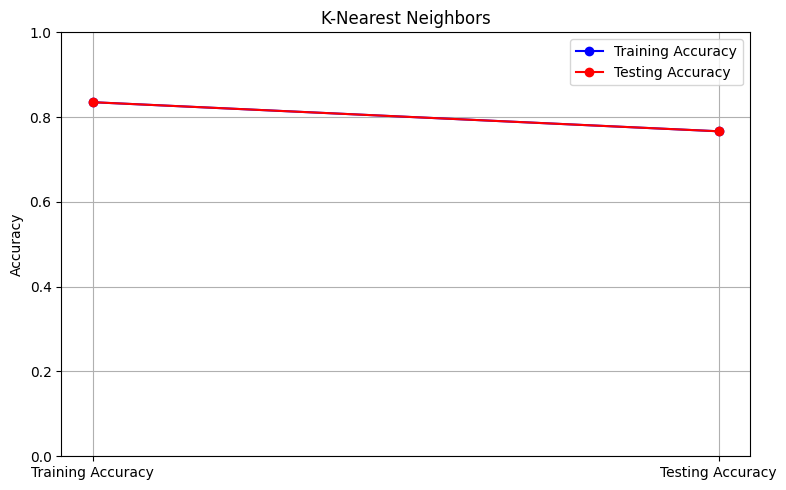

In [95]:
import matplotlib.pyplot as plt

# Create a DataFrame for visualization
accuracy_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Training Accuracy': train_accuracies,
    'Testing Accuracy': test_accuracies
})

# Create individual plots for each model's training and testing accuracy
for i, row in accuracy_df.iterrows():
    plt.figure(figsize=(8, 5))

    # Plotting training accuracy in blue and testing accuracy in red
    plt.plot(['Training Accuracy', 'Testing Accuracy'],
             [row['Training Accuracy'], row['Testing Accuracy']],
             marker='o', color='blue', label='Training Accuracy')

    plt.plot(['Training Accuracy', 'Testing Accuracy'],
             [row['Training Accuracy'], row['Testing Accuracy']],
             marker='o', color='red', label='Testing Accuracy')

    # Adding labels and title for each plot
    plt.title(row['Model'])
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Set y-axis limits to clearly show accuracy percentages
    plt.grid()
    plt.legend()

    # Show plot for each model
    plt.tight_layout()

# **Hyper Parameter Tuning**

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize best accuracy and best model
best_accuracy = 0
best_model = None
best_model_name = ""

# Define hyperparameter grids for each model
param_grids = {
    'Support Vector Classifier': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'Decision Tree Classifier': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest Classifier': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting Classifier': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'Gaussian Naive Bayes': {},
    'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],  # Regularization strength
        'solver': ['newton-cg', 'lbfgs', 'liblinear']  # Optimization algorithms
    }
}

# Train and tune each model using Grid Search
for model_name in param_grids.keys():
    # Initialize the model based on the name
    if model_name == 'Support Vector Classifier':
        model = SVC()
    elif model_name == 'Decision Tree Classifier':
        model = DecisionTreeClassifier()
    elif model_name == 'Random Forest Classifier':
        model = RandomForestClassifier()
    elif model_name == 'Gradient Boosting Classifier':
        model = GradientBoostingClassifier()
    elif model_name == 'Gaussian Naive Bayes':
        model = GaussianNB()
    elif model_name == 'K-Nearest Neighbors':
        model = KNeighborsClassifier()
    elif model_name == 'Logistic Regression':
        model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed

    # Set up GridSearchCV with cross-validation
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5)

    # Fit the model on training data
    grid_search.fit(X_train_scaled, y_train)

    # Predict on test data using the best estimator
    y_pred = grid_search.best_estimator_.predict(X_test_scaled)

    # Calculate accuracy on test data
    test_accuracy = grid_search.score(X_test_scaled, y_test)

    # Print results
    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Check if this is the best model so far
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = grid_search.best_estimator_
        best_model_name = model_name

print(f"\nBest Model: {best_model}\nBest Accuracy: {best_accuracy:.2f}")


Model: Support Vector Classifier
Best Parameters: {'C': 0.1, 'kernel': 'linear'}
Test Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1161
           1       0.79      0.80      0.79      1161

    accuracy                           0.79      2322
   macro avg       0.79      0.79      0.79      2322
weighted avg       0.79      0.79      0.79      2322

Model: Decision Tree Classifier
Best Parameters: {'max_depth': 5, 'min_samples_split': 2}
Test Accuracy: 0.78
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1161
           1       0.77      0.81      0.79      1161

    accuracy                           0.78      2322
   macro avg       0.78      0.78      0.78      2322
weighted avg       0.78      0.78      0.78      2322

Model: Random Forest Classifier
Best Parameters: {'max_depth': None, 'min_samples_split':

# **Insights After Tuning**
* Gradient Boosting Classifier emerged as the best model with a test accuracy of 0.81 and the best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}.

* This model performs consistently well across both classes, as reflected in the classification report.

* Random Forest Classifier follows closely with a test accuracy of 0.80. It also shows balanced precision and recall for both classes.

Other models like the Support Vector Classifier, Gaussian Naive Bayes, and Logistic Regression achieved accuracies of 0.79, while Decision Tree and K-Nearest Neighbors performed slightly lower at 0.78.

**Summary of Performance:**

Best Model: Gradient Boosting Classifier
Best Accuracy: 0.81
All models displayed good balance in precision and recall, with macro averages around 0.78 to 0.81.


**Save the Model**

In [97]:
# Save the best model to a file
model_filename = 'best_model.joblib'
joblib.dump(best_model, model_filename)

print(f'Best model saved to {model_filename} with accuracy: {best_accuracy:.4f}')
print(f'Best model saved is {best_model_name}')  # Use the best_model_name variable




Best model saved to best_model.joblib with accuracy: 0.8092
Best model saved is Gradient Boosting Classifier


In [98]:
!pip install -U scikit-learn


In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
import joblib

# Load your dataset
df = pd.read_csv('/content/placementdata.csv')


In [100]:
df.drop(columns=['StudentID'], inplace=True)

In [101]:
df.isnull().sum()

CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

In [102]:
df.duplicated().sum()

72

In [103]:
dp=df[df.duplicated()]
dp

CGPA  Internships  Projects  Workshops/Certifications  \
595    8.5            2         3                         2   
1060   8.7            2         3                         2   
1887   8.1            2         3                         2   
1953   8.5            2         3                         2   
2743   8.3            2         3                         2   
...    ...          ...       ...                       ...   
9820   8.2            1         3                         2   
9902   8.3            2         3                         2   
9953   8.4            2         3                         2   
9977   8.3            2         3                         2   
9985   8.5            2         3                         2   

      AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
595                  90               4.8                       Yes   
1060                 90               4.8                       Yes   
1887                 90               4.8                       Yes   
1953                 90               4.8                       Yes   
2743                 90               4.8                       Yes   
...                 ...               ...                       ...   
9820                 90               4.8                       Yes   
9902                 90               4.8                       Yes   
9953                 90               4.8                       Yes   
9977                 90               4.8                       Yes   
9985                 90               4.8                       Yes   

     PlacementTraining  SSC_Marks  HSC_Marks PlacementStatus  
595                Yes         80         84          Placed  
1060               Yes         79         85          Placed  
1887               Yes         84         86          Placed  
1953               Yes         81         85          Placed  
2743               Yes         80         88          Placed  
...                ...        ...        ...             ...  
9820               Yes         81         83          Placed  
9902               Yes         80         84          Placed  
9953               Yes         79         85          Placed  
9977               Yes         82         88          Placed  
9985               Yes         81         80          Placed  

[72 rows x 11 columns]

In [104]:
df.describe()

CGPA   Internships      Projects  Workshops/Certifications  \
count  10000.000000  10000.000000  10000.000000              10000.000000   
mean       7.698010      1.049200      2.026600                  1.013200   
std        0.640131      0.665901      0.867968                  0.904272   
min        6.500000      0.000000      0.000000                  0.000000   
25%        7.400000      1.000000      1.000000                  0.000000   
50%        7.700000      1.000000      2.000000                  1.000000   
75%        8.200000      1.000000      3.000000                  2.000000   
max        9.100000      2.000000      3.000000                  3.000000   

       AptitudeTestScore  SoftSkillsRating     SSC_Marks     HSC_Marks  
count       10000.000000      10000.000000  10000.000000  10000.000000  
mean           79.449900          4.323960     69.159400     74.501500  
std             8.159997          0.411622     10.430459      8.919527  
min            60.000000          3.000000     55.000000     57.000000  
25%            73.000000          4.000000     59.000000     67.000000  
50%            80.000000          4.400000     70.000000     73.000000  
75%            87.000000          4.700000     78.000000     83.000000  
max            90.000000          4.800000     90.000000     88.000000

In [105]:
df.shape

(10000, 11)

In [106]:
num_data=df.select_dtypes(include=['int64','float64']).columns
num_data
cat_data=df.select_dtypes(include=['object']).columns
cat_data

Index(['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus'], dtype='object')

In [107]:
# Apply IQR method for handling outliers
# Iterate through the specified columns
for col in ['CGPA', 'Internships', 'Projects', 'Workshops/Certifications',
            'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']:
    Q1 = df[col].quantile(0.25)  # Calculate the first quartile (25th percentile)
    Q3 = df[col].quantile(0.75)  # Calculate the third quartile (75th percentile)
    IQR = Q3 - Q1  # Calculate the interquartile range
    lower_bound = Q1 - 1.5 * IQR  # Calculate lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR  # Calculate upper bound for outliers

    print(f"{col}: Outliers are below {lower_bound} and above {upper_bound}")

    # Filter data based on the calculated bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Round the filtered numerical columns to whole numbers if necessary
df['CGPA'] = df['CGPA'].round(2)  # Rounding CGPA to 2 decimal places (if applicable)
df['Internships'] = df['Internships'].round(0).astype(int)
df['Projects'] = df['Projects'].round(0).astype(int)
df['Workshops/Certifications'] = df['Workshops/Certifications'].round(0).astype(int)
df['AptitudeTestScore'] = df['AptitudeTestScore'].round(0).astype(int)
df['SoftSkillsRating'] = df['SoftSkillsRating'].round(0).astype(int)
df['SSC_Marks'] = df['SSC_Marks'].round(0).astype(int)
df['HSC_Marks'] = df['HSC_Marks'].round(0).astype(int)

# Display the cleaned DataFrame
print(df)


CGPA: Outliers are below 6.200000000000002 and above 9.399999999999999
Internships: Outliers are below 1.0 and above 1.0
Projects: Outliers are below -2.0 and above 6.0
Workshops/Certifications: Outliers are below -3.0 and above 5.0
AptitudeTestScore: Outliers are below 54.0 and above 102.0
SoftSkillsRating: Outliers are below 3.1000000000000005 and above 5.499999999999999
SSC_Marks: Outliers are below 28.5 and above 104.5
HSC_Marks: Outliers are below 42.0 and above 106.0
      CGPA  Internships  Projects  Workshops/Certifications  \
0      7.5            1         1                         1   
2      7.3            1         2                         2   
3      7.5            1         1                         2   
4      8.3            1         2                         2   
6      7.7            1         1                         1   
...    ...          ...       ...                       ...   
9987   7.7            1         2                         0   
9988   7.3        

In [108]:
df[num_data].skew()

CGPA                       -0.218875
Internships                 0.000000
Projects                    0.219294
Workshops/Certifications    0.513992
AptitudeTestScore          -0.158708
SoftSkillsRating            0.348668
SSC_Marks                   0.282322
HSC_Marks                   0.289537
dtype: float64

In [109]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

# Define features and target variable
X = df.drop('PlacementStatus', axis=1)
y = df['PlacementStatus']

# Identify categorical and numerical features
categorical_features = ['ExtracurricularActivities', 'PlacementTraining']
numerical_features = ['CGPA', 'Internships', 'Projects', 'Workshops/Certifications',
                      'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']

# Define individual transformers for preprocessing
trf_numerical = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))  # Impute missing numerical values
])

trf_categorical = Pipeline(steps=[
    ('one_hot_encoding', OneHotEncoder(drop='first', handle_unknown='ignore'))  # One-hot encoding
])

# Create the main ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', trf_numerical, numerical_features),
        ('cat', trf_categorical, categorical_features),
    ],
    remainder='drop'  # Drop any extra columns
)

# Create the full pipeline with a classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier())  # Classifier (can be changed)
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['CGPA', 'Internships',
                                                   'Projects',
                                                   'Workshops/Certifications',
                                                   'AptitudeTestScore',
                                                   'SoftSkillsRating',
                                                   'SSC_Marks', 'HSC_Marks']),
                                                 ('cat',
                                                  Pipeline(steps=[('one_hot_encoding',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['ExtracurricularActivities',
                                                   'PlacementTraining'])])),
                ('classifier', GradientBoostingClassifier())])

In [110]:
import pandas as pd

# Create unseen data
unseen_data = pd.DataFrame({
    'CGPA': [8.5, 7.2,4],
    'Internships': [2, 1,0],
    'Projects': [3, 2,0],
    'Workshops/Certifications': [4, 2,1],
    'AptitudeTestScore': [85, 75,65],
    'SoftSkillsRating': [8, 7,5],
    'SSC_Marks': [88, 80,70],
    'HSC_Marks': [90, 78,74],
    'ExtracurricularActivities': ['Yes', 'No','No'],
    'PlacementTraining': ['Yes', 'Yes','No']
})

# Print the DataFrame
print(unseen_data)


   CGPA  Internships  Projects  Workshops/Certifications  AptitudeTestScore  \
0   8.5            2         3                         4                 85   
1   7.2            1         2                         2                 75   
2   4.0            0         0                         1                 65   

   SoftSkillsRating  SSC_Marks  HSC_Marks ExtracurricularActivities  \
0                 8         88         90                       Yes   
1                 7         80         78                        No   
2                 5         70         74                        No   

  PlacementTraining  
0               Yes  
1               Yes  
2                No  


In [111]:
predictions = pipeline.predict(unseen_data)
print(predictions)


['Placed' 'NotPlaced' 'NotPlaced']


In [112]:
import joblib

# Save the pipeline to a file
joblib.dump(pipeline, 'placement_prediction_model.joblib')


['placement_prediction_model.joblib']

In [113]:
# Load the saved pipeline
loaded_pipeline = joblib.load('placement_prediction_model.joblib')

# Predict on new unseen data
predictions = loaded_pipeline.predict(unseen_data)
print(predictions)

['Placed' 'NotPlaced' 'NotPlaced']


#**Conclusion**

This project focused on predicting student placements using machine learning. We used important features like grades, skills, and activities. The Gradient Boosting Classifier achieved the best accuracy of 0.81, showing it can effectively predict which students are likely to get placed. This model can help schools support students in their job search.

#**Limitations**
Even though the dataset is clean without outliers, skewness, or missing values, there are still some challenges. The model's performance could be affected by how we select features and the amount of data available. Improving feature selection and trying different tuning techniques can make the model even better.

#**Future Work**
**Advanced Modeling:**
 We could try using more advanced models like Neural Networks to see if we can improve accuracy even more.

**Real-World Use:**
 Creating a user-friendly dashboard or app that gives placement predictions and insights for students and career advisors.

**Fairness Check:** Making sure the model works well for all students, regardless of their background or skills, to avoid any unfair predictions.

**Skill Analysis:** Looking into how specific skills affect placement success to help schools improve their programs and better prepare students for jobs.

